In [1]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
string = '/h/kuyeda/INPUT/'

## Topography

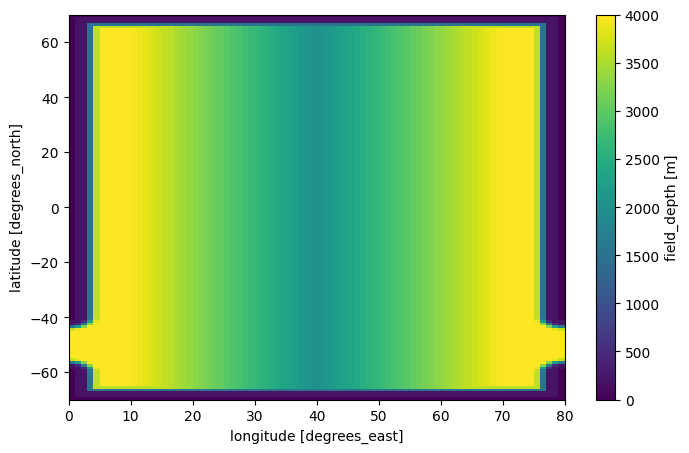

In [3]:
topo = xr.open_dataset(string + 'topo_file_test1.nc')
topo.z.plot()

## Wind

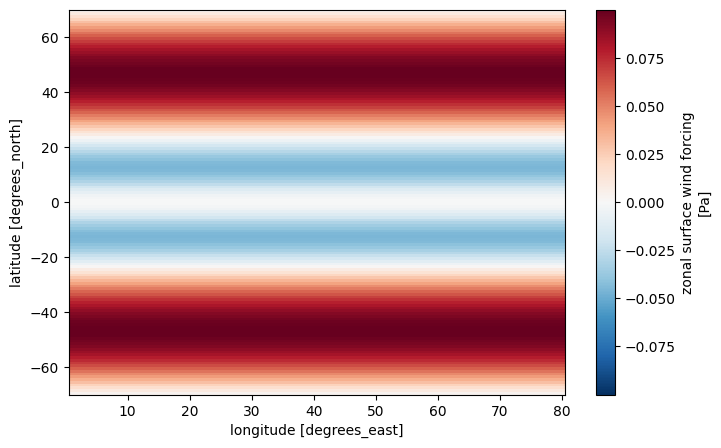

In [4]:
wind = xr.open_dataset(string + 'wind_sample_nov_10.nc')
wind.taux.plot()

## SST

In [5]:
sst = xr.open_dataset(string + '11-27_NaN_SST.nc')

Text(0.5, 0.98, 'Idealized Model Set-Up')

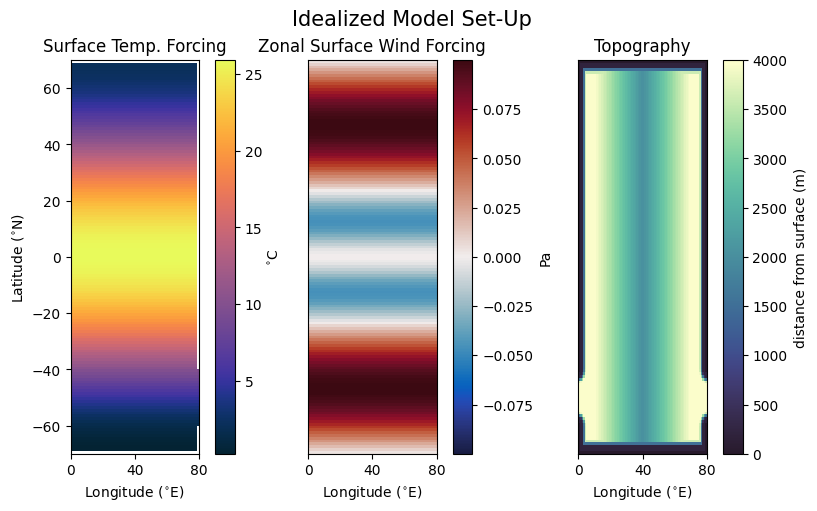

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=3,constrained_layout=True)
sst.SST.plot(cbar_kwargs={'label':'$^{\circ}$C'},ax=ax[0],cmap=cmocean.cm.thermal)
ax[0].set_aspect(140/80)
ax[0].set_title('Surface Temp. Forcing')
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
ax[0].set_xlabel('Longitude ($^{\circ}$E)')
ax[0].set_xlim(0,80)
ax[0].set_xticks((0,40,80))

wind.taux.plot(cbar_kwargs={'label':'Pa'},ax=ax[1],cmap=cmocean.cm.balance)
ax[1].set_aspect(140/80)
ax[1].set_title('Zonal Surface Wind Forcing')
ax[1].set_ylabel('')
ax[1].set_xlabel('Longitude ($^{\circ}$E)')
ax[1].set_xlim(0,80)
ax[1].tick_params(axis='y',left=False,labelleft=False)
ax[1].set_xticks((0,40,80))

topomap = cmocean.tools.crop(cmocean.cm.topo,0,2000,2000)
topo.z.plot(cbar_kwargs = {'label':'distance from surface (m)'},ax=ax[2],cmap=topomap)
ax[2].set_aspect(140/80)
ax[2].set_title('Topography')
ax[2].set_ylabel('')
ax[2].set_xlabel('Longitude ($^{\circ}$E)')
ax[2].set_xlim(0,80)
ax[2].set_xlim(0,80)
ax[2].tick_params(axis='y',left=False,labelleft=False)
ax[2].set_xticks((0,40,80))


fig.suptitle('Idealized Model Set-Up',fontsize=15)

In [17]:
wind

<xarray.Dataset>
Dimensions:  (xh: 80, yh: 140, xq: 80, yq: 140)
Coordinates:
  * xh       (xh) float32 0.5 1.5 2.5 3.5 4.5 5.5 ... 75.5 76.5 77.5 78.5 79.5
  * yh       (yh) float32 -69.5 -68.5 -67.5 -66.5 -65.5 ... 66.5 67.5 68.5 69.5
  * xq       (xq) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 76.0 77.0 78.0 79.0 80.0
  * yq       (yq) float32 -69.0 -68.0 -67.0 -66.0 -65.0 ... 67.0 68.0 69.0 70.0
Data variables:
    taux     (yh, xq) float32 ...
    tauy     (yq, xh) float32 ...
Attributes:
    title:     wind forcing test
    subtitle:  subtitle

In [26]:
sst.SST.shape

(140, 80)

(-80.0, 80.0)

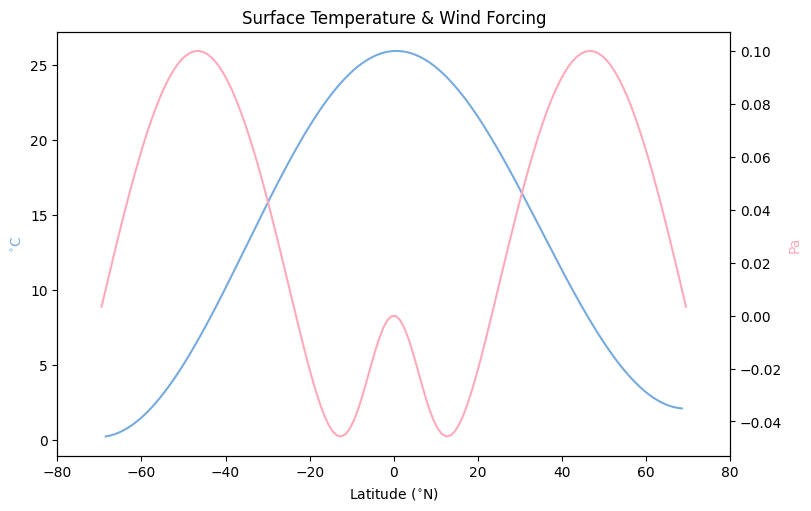

In [31]:
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
sst.SST.isel(xh=40).plot(label='Temperature ($\theta$)',color='#77AADD')
ax2 = ax.twinx()
wind.taux.isel(xq=40).plot(label='Wind ($\\tau_x$)',color='#FFAABB')
ax.set_title('Surface Temperature & Wind Forcing')
ax.set_ylabel('$^{\circ}$C',color='#77AADD')
ax.tick_params(axis='y')

ax2.set_title('')
ax2.tick_params(axis='y')
ax2.set_ylabel('Pa',color='#FFAABB')

ax.set_xlabel('Latitude ($^{\circ}$N)')
ax.set_xlim(-80,80)

## NET_SOL

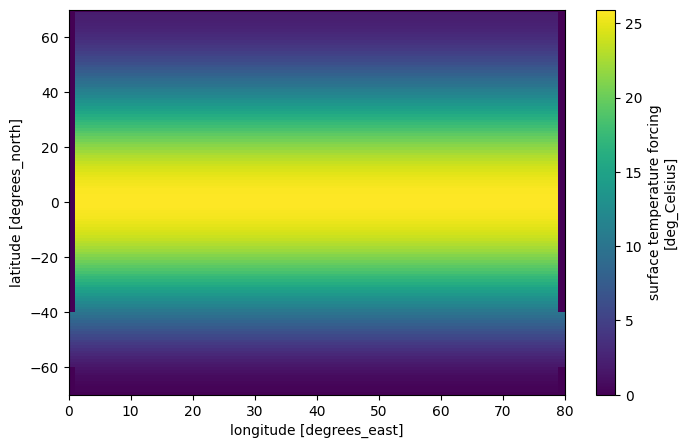

In [9]:
net_sol = xr.open_dataset(string + '11-27_zero_NET_SOL.nc')
net_sol.NET_SOL.plot()

## SAL

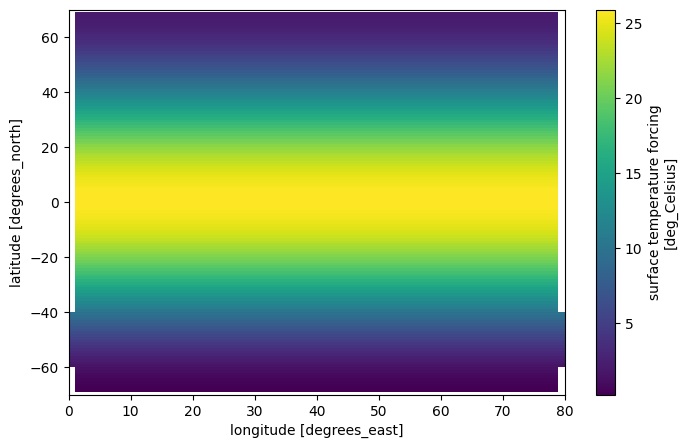

In [10]:
sal = xr.open_dataset(string + '11-27_NaN_SAL.nc')
sal.SAL.plot()

## Heat

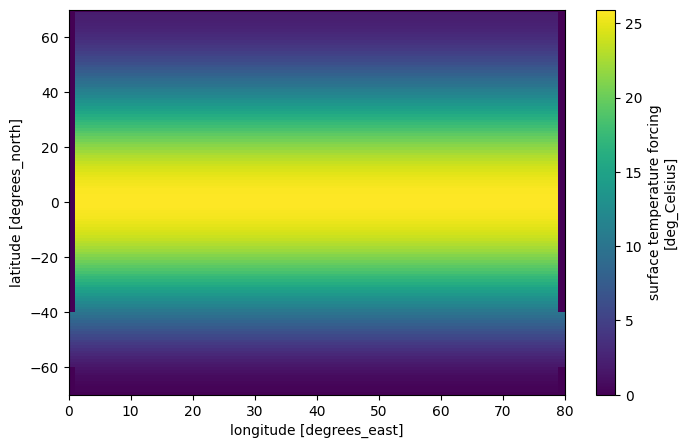

In [11]:
heat = xr.open_dataset(string + '11-27_zero_Heat.nc')
heat.Heat.plot()

## Precip minus Evap

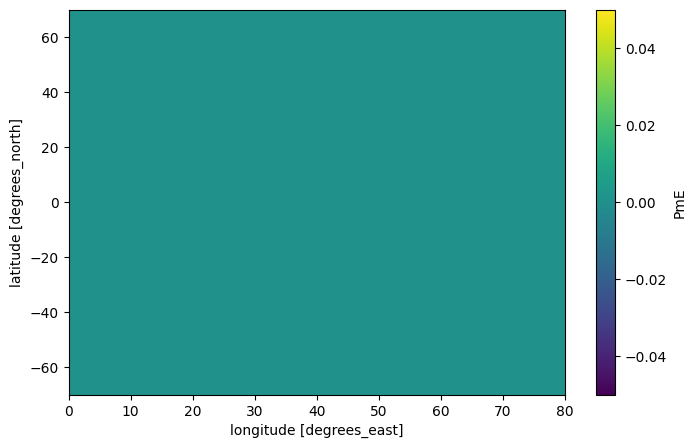

In [12]:
PmE = xr.open_dataset(string + '11-29_PmE_all_zeros.nc')
PmE.PmE.plot()